In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph

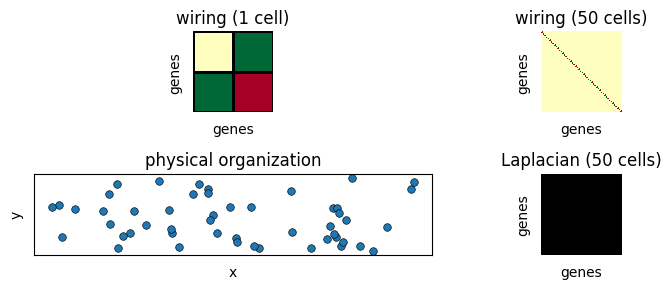

In [95]:
n = 50 # number of cells
knn = 2

# wiring diagram
A = np.array([[0, 1,],
              [1, -1,],])

# physical organization
# np.random.seed(1729)
X = np.random.rand(n, 2)
W = kneighbors_graph(X, knn, mode='connectivity', include_self=False)

L = csgraph.laplacian(W, normed=True, symmetrized=True)
L = L.todense()

Lhat = Ahat = np.kron(A, L)
Ahat = np.kron(np.eye(n), A)

fig, axs = plt.subplots(2, 2)

sns.heatmap(A, 
            cmap='RdYlGn',
            lw=1,
            linecolor='k',
            ax=axs[0, 0],
            cbar=False,
            square=True)

axs[0, 0].set_title("wiring (1 cell)")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_ylabel("genes")
axs[0, 0].set_xlabel("genes")

sns.heatmap(Ahat, 
            cmap='RdYlGn',
            ax=axs[0, 1],
            cbar=False,
            square=True)


axs[0, 1].set_title(f"wiring ({n} cells)")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_ylabel("genes")
axs[0, 1].set_xlabel("genes")


sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                ec='k',
                s=30,
                ax=axs[1, 0])

axs[1, 0].set_title(f"physical organization")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_ylabel("y")
axs[1, 0].set_xlabel("x")

sns.heatmap(L, 
            cmap='coolwarm',
            lw=0.1,
            linecolor='k',
            ax=axs[1, 1],
            cbar=False,
            square=True)


axs[1, 1].set_title(f"Laplacian ({n} cells)")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_ylabel("genes")
axs[1, 1].set_xlabel("genes")

plt.tight_layout()

(11, 100)


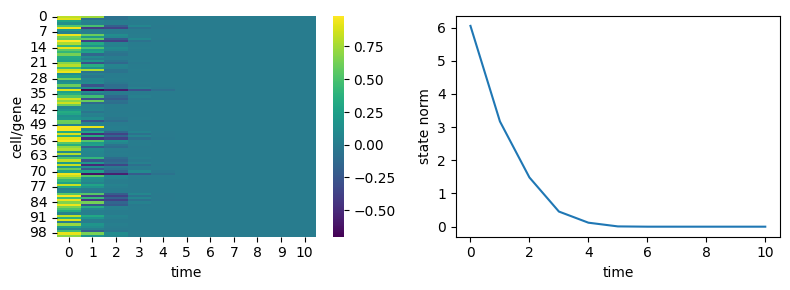

<AxesSubplot: >

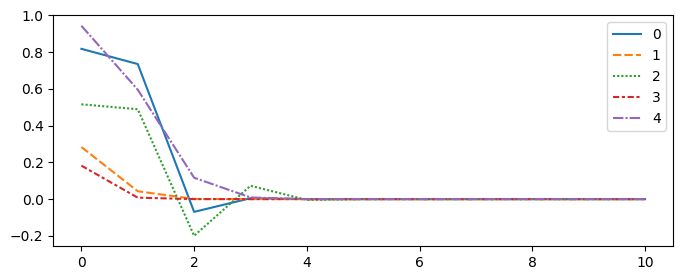

In [103]:
n_time = 10
alpha = 1
beta = 0.01
x0 = np.random.rand(len(Ahat)) 
# x0 = np.zeros(len(Ahat))
# x0 = np.random.rand(len(Ahat)) + 1


def func(A, L, n_time, x0, alpha, beta):
    """A function to compute the evolution """
    history = [x0.flatten()]
    
    for t in range(n_time):
        x = history[t]
        # print(f"{A.shape} {L.shape=} {x.shape=}")
        dxdt = alpha*(A @ x) - beta*(L @ x)
        xp1 = np.multiply(x, dxdt)
        
        xp1 = np.asarray(xp1)
        history.append(xp1.flatten())

    return np.asarray(history)
        

ev = func(Ahat, Lhat, n_time, x0, alpha, beta)
print(f"{ev.shape}")

plt.rcParams['figure.figsize'] = 8, 3
fig, axs = plt.subplots(1, 2)


sns.heatmap(ev.T, cmap='viridis', ax=axs[0])

axs[0].set_xlabel('time')
axs[0].set_ylabel('cell/gene')

k = np.linalg.norm(ev,  axis=1)
sns.lineplot(k, ax=axs[1])
axs[1].set_xlabel('time')
axs[1].set_ylabel('state norm')

plt.tight_layout()
plt.show()

offset = np.arange(0, len(Ahat), len(A))


sns.lineplot(ev.T[ind, :].T, 
             c=f'C0')
# for g in range(len(A)):
#     ind = offset + g

#     sns.lineplot(ev.T[ind, :].T, 
#                  c=f'C{g}')

#     break

In [98]:
offset

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])